# README

Este projeto, seguirar uma metodologia diferente dos demais anteriores a este, será feito baseado em um projeto de outro aluno(a), 
no caso este link(). Por fim, terá no meu respositório dois notebook, o que segue o da minha colega mais uma reflexão quando 
descordar do caminho tomado ou desenvolvido mais subjetivo, não que eu seja voz da razão, sei que aprenderei muito com ela. 
Por último, um notebook final, que será mais enchuto, por ser construído após a aula do professor Meigram! 

# 0.0 imports

In [508]:
#dataprocess
import pandas as pd
import numpy  as np
import re
import inflection

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# 0.1 Help fucntion

# 1. Load Dataset 

In [509]:
dff = pd.read_csv('/home/win/Documentos/pa05/data/Ecommerce.csv', encoding='latin1')


In [510]:
df = dff

In [511]:
# Analisando os dados 
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [512]:
df['Unnamed: 8'].unique()

array([nan])

* coluna 'Unnamed: 8' deve ser dropada!

In [513]:
df.drop(columns = 'Unnamed: 8',  inplace = True)

# 2. Data Description

**Contexto**

Dados de comércio Eletrônico

**Conteúdo**

Este é um conjunto de dados transnacional que contém todas as transações que ocorrem entre 01/12/2010 e 09/12/2011 para um varejo on-line sem loja com sede no Reino Unido e registrado. A empresa vende principalmente presentes exclusivos de todas as ocasiões. Muitos clientes da empresa são atacadistas.

fonte: https://archive.ics.uci.edu/dataset/502/online+retail+ii

                            **Attribute Description**

InvoiceNo:    Número da fatura (um número integral de 6 dígitos atribuído exclusivamente a cada transação)

StockCode:    Código do produto (item)

Description:  Product (item) name

Quantity:     As quantidades de cada produto (item) por transação

InvoiceDate:  O dia em que cada transação foi gerada

UnitPrice:    Preço unitário (Preço do produto por unidade)

CustomerID:   Número do cliente (ID exclusivo atribuído a cada cliente)

Country:      Nome do país (O nome do país onde cada cliente reside)

Analysis tasks to be performed:

Use the clustering methodology to segment customers into groups:



| Nome variável       | Papel     | Tipo | Descrião do produto | Unidades de Ações | Valores perdidos|
|--------------|-----------|------------|------------|------------|------------|
| InvoiceNo (em voz) | ID     | Categorial   | um número integral de 6 dígitos atribuído exclusivamente a cada transação. **Se este código começar com a letra 'c', indica um cancelamento**|| No|
| Cod,o do stock     | ID     | Categorial       |um número integral de 5 dígitos atribuído exclusivamente a cada produto distinto|| No|
|Description|	Feature|	Categorical|	product name|		|no|
|Quantity	|Feature|	Integer|	the quantities of each product (item) per transaction|		|no|
|InvoiceDate	|Feature	|Date|	the day and time when each transaction was generated|		|no|
|UnitPrice	|Feature	|Continuous	|product price per unit	|sterling|	no|
|CustomerID|Feature|Categorical|um número integral de 5 dígitos atribuído exclusivamente a cada cliente|	|no|
|Country|	Feature|	Categorical|	the name of the country where each customer resides|		|no|

| Item         | Price | # In stock |
|--------------|:-----:|-----------:|
| Juicy Apples |  1.99 |        739 |
| Bananas      |  1.89 |          6 |

## 2.1 Rename Columns

In [514]:
list(df.columns)

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [515]:
cols_old = list(df.columns)

snakecase = lambda x : inflection.underscore( x )
cols_new = list(map(snakecase, cols_old))

df.columns = cols_new


## 2.2 Data Dimensions

In [516]:
print('Number of Rows: {}'.format( df.shape[0]))
print( 'Number of Cols: {}'.format( df.shape[1] ) )

Number of Rows: 541909
Number of Cols: 8


## 2.3 Data Types

In [517]:
df.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [518]:
df['invoice_no'].unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

* coluna invoice_no, deve mudar seu tipo para int64

## 2.4 Check NA

In [519]:
df.isna().sum() 

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

In [520]:
(df.isna().sum() / 541909 ) *100

invoice_no       0.000000
stock_code       0.000000
description      0.268311
quantity         0.000000
invoice_date     0.000000
unit_price       0.000000
customer_id     24.926694
country          0.000000
dtype: float64

REFLEXÃO p/ trabalhar com os NANs

**Objetivo do trabalhoh:** Usa a metodologia de clustering para segmentar clientes em grupos! 

Formas de tratar os NAN:

    * Deletar ( df.dropna() )
        * + (vantagem        -  Simples
        * - (Desvantagem )   -  Perda de informação
        * Goal               -  Depende da quantidade 
   
    * Preencher
        * + (vantagem        -  Mantém o tamanho original dos dados
        * - (Desvantagem )   -  Caso a distribuição n seja normal, pode fica com muito viés!
        * Goal               -  Atrapalharia na segmentação e interpretação do cliente!
    
    * Interpolar
        * + (vantagem        -  Mantém a integridade de seres temporais 
        * - (Desvantagem )   -  Pode distorcer com informações falsas
        * Goal               -  Segmentar o cliente errado no grupo, pois o mesmo pode aparecer mais de uma vez, com uma pequenas  diferança nas suas características.
    
    * Modelos Estatísticos
        * + (vantagem        -  Abordagem mais sofisticada 
        * - (Desvantagem )   -  Reque muito recurso do computador e pode ser impreciso
        * Goal               -  Pode acumular muita informação incorreta!

Conclusão: Melhor caminho, baseado na quantidade máximo de perda é 25% de perda de informação.

## 2.5 Fillout NAN ou Null

colunas com NA description, customer_id

In [521]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


In [522]:
df['description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [523]:
df['customer_id'].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

##### Qual seria o plano
    * customer_id - O id, ele traz uma identificação do cliente, contudo
    * description - pode subtituir por "sem comentário"



###### Tentativa 1 ( X )

In [524]:
df1 = df.dropna()

In [525]:
df1.isnull().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

###### Tentativa 2

In [526]:
#df_missing     = df.loc[df1['customer_id'].isna(), :]
#df_not_missing = df.loc[~df1['customer_id'].isna(), :]

#create reference
#df_backup = pd.DataFrame(df_missing['invoice_no']).drop_duplicates()
#df_backup['customer_id'] = np.arange(19000, 19000 + len(df_backup), 1)

#merge original with reference dataframe
#df1 = pd.merge(df1, df_backup, on='invoice_no', how='left')

#coalesce 
#df1['customer_id'] = df1['customer_id_x'].combine_first(df1['customer_id_y'])

#drop extra columns
#df1 = df1.drop(columns=['customer_id_x', 'customer_id_y'], axis=1)
#df1.head()


## 2.7 Change Type

In [527]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [528]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


In [529]:
# invoice_no
#df1['invoice_no']   = df1['invoice_no'].astype( int ) 

#invoice date
df1.loc[:, 'invoice_date'] = pd.to_datetime(df1.loc[:,'invoice_date'], format= '%d-%b-%y') 

#customer id
df1.loc[:, 'customer_id'] = df1.loc[:, 'customer_id'].astype(int)
df1.dtypes



invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

 ## 2.7 Descriptive Statistics

In [530]:
num_attributes = df1.select_dtypes( include = ['int64', 'int32', 'float64'] )
cat_attributes = df1.select_dtypes( exclude = ['int64', 'int32', 'float64', 'datetime64[ns]'] )

## 2.7.1 Numerical Attributes

In [531]:
#central tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#dispersion 
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(np.max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#concatenate
m1 = pd.concat([d2 ,d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m1 = m1.drop([2])
m1.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis' ]
m1


,attributes,min,max,range,mean,median,std,skew,kurtosis
0,quantity,-80995.0,80995.0,161990.0,12.061303,5.00,248.693064,0.182663,94317.563673
1,unit_price,0.0,38970.0,38970.0,3.460471,1.95,69.315077,452.219019,246924.542988


## 2.7.2 Categorical Attributes

In [532]:
cat_attributes.head()

,invoice_no,stock_code,description,invoice_date,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2016-11-29 00:00:00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,2016-11-29 00:00:00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2016-11-29 00:00:00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2016-11-29 00:00:00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2016-11-29 00:00:00,United Kingdom


In [533]:
df_letter_invoices = df1.loc[df1['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+', x))), :]

#check if the number of invoices that contains letters are igual with negative quantity
print('Total number of invoices: {}'.format(len(df_letter_invoices)))
print('Total number of negative quantity: {}'.format(len(df_letter_invoices[df_letter_invoices['quantity'] < 0])))



Total number of invoices: 8905
Total number of negative quantity: 8905


**Stock code**

In [534]:
cat_attributes.loc[cat_attributes['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z]+$', x))), 'stock_code']

45        POST
141          D
386       POST
1123      POST
2239         M
          ... 
541216    POST
541541       M
541730    POST
541767    POST
541768    POST
Name: stock_code, Length: 1774, dtype: object

In [535]:
df1.loc[cat_attributes['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z]+$', x))), :].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
45,536370,POST,POSTAGE,3,2016-11-29 00:00:00,18.00,12583.0,France
141,C536379,D,Discount,-1,2016-11-29 00:00:00,27.50,14527.0,United Kingdom
386,536403,POST,POSTAGE,1,2016-11-29 00:00:00,15.00,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,2016-11-29 00:00:00,18.00,12662.0,Germany
2239,536569,M,Manual,1,2016-11-29 00:00:00,1.25,16274.0,United Kingdom


## 3.0 Filter Variables

In [536]:
df2 = df1

In [537]:
df2.describe()

,quantity,unit_price,customer_id
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [538]:
#unit price > 0.0
#df2 = df2.loc[df2['unit_price'] > 0.04, :]

#stock code different of ['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK']
#df2 = df2[~df2['stock_code'].isin(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY','DCGSSGIRL', 'PADS', 'B', 'CRUK'])]

#description
df2.drop(columns='description', axis=1, inplace = True)

#map New Feacture
#df2 = df2[~df2['country'].isin(['European Community', 'Unspecified'])] # isin(comparado) se comparado for igual ao de fora retorna True
#A ideia nesse código de cima está mal feito, a ideia ao que parece é pegar 
#todos os paídes da europa e subtituir por 'European Community' e fora por 'Unspecified'
# uma forma de fazer isso é criar uma lista country_europa, depois é só 
# df2['europeu'] = df2['country'].apply(lambda x : 1 if x is in country_europa else 0 )

#bad users
#df2 = df2[~df2['customer_id'].isin([16446])] #user com numero muito grande de retornos 

#quantity - dividing in return and purchase 
returns = df2.loc[df2['quantity'] < 0, :]
purchases = df2.loc[df2['quantity'] >= 0, :]

/tmp/ipykernel_648273/2185533012.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns='description', axis=1, inplace = True)


# 4.0 Features Engineering

In [539]:
df3 = df2

In [540]:
# Image map mental

**Conjunto New Features**

In [541]:
# Conjunto New Features
# Nesse conjunto alguma alterações personalizadas ficaram disponível, pois pode conter linhas a menos do que o geral
df_ref = df3.drop(['invoice_no', 'stock_code', 'quantity', 'invoice_date','unit_price', 
                   'country'], axis=1).drop_duplicates(ignore_index=True)
df_ref.head()

,customer_id
0,17850.0
1,13047.0
2,12583.0
3,13748.0
4,15100.0


## 4.1 Create Engineering 

### 4.1.1 Time

In [542]:
#year


# Convertendo a coluna para o formato datetime
df3['invoice_date'] = pd.to_datetime(df3['invoice_date'])

# .dt para extrair o ano, M
df3['year'] = df3['invoice_date'].dt.year


# month
df3['month'] = df3['invoice_date'].dt.month

df3['month_sin'] = df3['month'].apply(lambda x: np.sin( x* (2. * np.pi/12) ) )
df3['month_cos'] = df3['month'].apply(lambda x: np.cos( x* (2. * np.pi/12) ) )

/tmp/ipykernel_648273/2260121605.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['invoice_date'] = pd.to_datetime(df3['invoice_date'])
/tmp/ipykernel_648273/2260121605.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['year'] = df3['invoice_date'].dt.year
/tmp/ipykernel_648273/2260121605.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

### 4.1.2 Gross Revenue

In [543]:
df3.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id,country,year,month,month_sin,month_cos
0,536365,85123A,6,2016-11-29,2.55,17850.0,United Kingdom,2016,11,-0.5,0.866025
1,536365,71053,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,-0.5,0.866025
2,536365,84406B,8,2016-11-29,2.75,17850.0,United Kingdom,2016,11,-0.5,0.866025
3,536365,84029G,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,-0.5,0.866025
4,536365,84029E,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,-0.5,0.866025


In [544]:
cancelled = df3[df3['quantity'] < 0]
cancelled.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id,country,year,month,month_sin,month_cos
141,C536379,D,-1,2016-11-29,27.50,14527.0,United Kingdom,2016,11,-0.5,0.866025
154,C536383,35004C,-1,2016-11-29,4.65,15311.0,United Kingdom,2016,11,-0.5,0.866025
235,C536391,22556,-12,2016-11-29,1.65,17548.0,United Kingdom,2016,11,-0.5,0.866025
236,C536391,21984,-24,2016-11-29,0.29,17548.0,United Kingdom,2016,11,-0.5,0.866025
237,C536391,21983,-24,2016-11-29,0.29,17548.0,United Kingdom,2016,11,-0.5,0.866025


In [545]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


In [546]:
df[df['description'].str.contains(',', na=False)]



,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
109,536381,82567,"AIRLINE LOUNGE,METAL SIGN",2,29-Nov-16,2.10,15311.0,United Kingdom
253,536394,21506,"FANCY FONT BIRTHDAY CARD,",24,29-Nov-16,0.42,13408.0,United Kingdom
956,536520,22760,"TRAY, BREAKFAST IN BED",1,29-Nov-16,12.75,14729.0,United Kingdom
1014,536520,21111,"SWISS ROLL TOWEL, CHOCOLATE SPOTS",1,29-Nov-16,2.95,14729.0,United Kingdom
1083,536524,21111,"SWISS ROLL TOWEL, CHOCOLATE SPOTS",6,29-Nov-16,2.95,17572.0,United Kingdom
...,...,...,...,...,...,...,...,...
541255,581496,21462,"NURSERY A,B,C PAINTED LETTERS",8,7-Dec-17,1.95,16558.0,United Kingdom
541343,581498,21216,"SET 3 RETROSPOT TEA,COFFEE,SUGAR",2,7-Dec-17,10.79,NaN,United Kingdom
541549,581501,22165,"DIAMANTE HEART SHAPED WALL MIRROR,",12,7-Dec-17,3.95,12985.0,United Kingdom
541614,581516,21111,"SWISS ROLL TOWEL, CHOCOLATE SPOTS",24,7-Dec-17,1.25,14422.0,United Kingdom


**É importante resaltar o que já até aqui para mim ficou evidente, primeiro, quando um item é cancelado a fatura tem a letra C e 
quantity é negativo. Segundo, e mais interressante, na coluna 'description' cada linha tem único pedido, mesmo quando há virgulas, é 
uma descrição a mais, portanto, na coluna unit_price aquele preço se relaciona ao pedido descrito pela coluna 'description'.**

In [547]:


#df3['gross_revenue'] = df3['quantity'].apply(lambda x: df3.loc[:,'quantity'] * df3.loc[:,'unit_price'] if x > 0 else 0)
# Observe que se produto retorna de algum lugar claro que tem um custo, mas não tenho informação para estimar,
#por isso ele é zero!

df3['gross_revenue'] = np.where(df3['quantity'] > 0, df3['quantity'] * df3['unit_price'], 0)

#df3['gross_revenue'] = np.where(df3['gross_revenue'] == 0, df3['quantity'] * df3['unit_price'] ) adicionar o valor do gasto ao pacote
#cancelado

/tmp/ipykernel_648273/1595323423.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['gross_revenue'] = np.where(df3['quantity'] > 0, df3['quantity'] * df3['unit_price'], 0)


**Conjunto New Features**

In [548]:
# Cojunto New Features
purchases = df3[df3['quantity'] > 0]
#Monetary
df_monetary = purchases.loc[:, ['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_monetary 

,customer_id,gross_revenue
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


In [549]:
df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')
df_ref

,customer_id,gross_revenue
0,17850.0,5391.21
1,13047.0,3237.54
2,12583.0,7281.38
3,13748.0,948.25
4,15100.0,876.00
...,...,...
4367,13436.0,196.89
4368,15520.0,343.50
4369,13298.0,360.00
4370,14569.0,227.39


### 4.1.3 Returned

In [550]:
df3['returned'] = np.where(df3['quantity'] < 0, 1, 0)

/tmp/ipykernel_648273/471871448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['returned'] = np.where(df3['quantity'] < 0, 1, 0)


In [551]:
df3.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id,country,year,month,month_sin,month_cos,gross_revenue,returned
0,536365,85123A,6,2016-11-29,2.55,17850.0,United Kingdom,2016,11,-0.5,0.866025,15.30,0
1,536365,71053,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,-0.5,0.866025,20.34,0
2,536365,84406B,8,2016-11-29,2.75,17850.0,United Kingdom,2016,11,-0.5,0.866025,22.00,0
3,536365,84029G,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,-0.5,0.866025,20.34,0
4,536365,84029E,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,-0.5,0.866025,20.34,0


### 4.1.4 Recency - Days from last purchase

In [552]:
 df3.invoice_date.max()

Timestamp('2017-12-07 00:00:00')

**Conjunto New Features**

In [553]:
# Conjunto New Features
filtro =  df3[df3['quantity'] > 0]
df_recency = filtro.loc[:,['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index() # pegando a maior data de cada cliente, que também em linha temporal é 
# mais recente
df_recency['recency_days'] =  (df3.invoice_date.max() - df_recency.invoice_date).dt.days
df_recency

,customer_id,invoice_date,recency_days
0,12346.0,2017-01-16,325
1,12347.0,2017-12-05,2
2,12348.0,2017-09-23,75
3,12349.0,2017-11-19,18
4,12350.0,2017-01-31,310
...,...,...,...
4334,18280.0,2017-03-05,277
4335,18281.0,2017-06-10,180
4336,18282.0,2017-11-30,7
4337,18283.0,2017-12-04,3


In [554]:
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency, on='customer_id', how='left')
df_ref

,customer_id,gross_revenue,recency_days
0,17850.0,5391.21,372.0
1,13047.0,3237.54,31.0
2,12583.0,7281.38,2.0
3,13748.0,948.25,95.0
4,15100.0,876.00,333.0
...,...,...,...
4367,13436.0,196.89,1.0
4368,15520.0,343.50,1.0
4369,13298.0,360.00,1.0
4370,14569.0,227.39,1.0


#O calculo será feito com referência a linha temporal dentro do dataset 
 Para calcular a diferença em dias entre uma data em seu conjunto de dados e a data atual, você pode seguir estes passos:


import pandas as pd
from datetime import datetime

#Defina a data presente
data_atual = pd.Timestamp.now()

#Data do conjunto de dados
data_do_dataset = pd.Timestamp('2017-12-07 00:00:00')

#Calcular a diferença em dias
diferenca_em_dias = (data_atual - data_do_dataset).days

print(f'A diferença em dias entre {data_do_dataset} e a data de hoje é de {diferenca_em_dias} dias.')




In [555]:

#de cada cliente, que também em linha temporal é 
rel = ( df3.invoice_date.max() - df3.invoice_date) 
df3['recency_days'] = rel.dt.days


/tmp/ipykernel_648273/2928371632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['recency_days'] = rel.dt.days


In [556]:
df3.isnull().sum()

invoice_no       0
stock_code       0
quantity         0
invoice_date     0
unit_price       0
customer_id      0
country          0
year             0
month            0
month_sin        0
month_cos        0
gross_revenue    0
returned         0
recency_days     0
dtype: int64

### 4.1.5 Quantity purchased 

In [557]:
df3.shape

(406829, 14)

In [558]:
# Quantidade de vezes que o cliente realizou a compra
df_freq = filtro.loc[:, ['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index().rename(columns = { 'invoice_no': 'qtde_invoices'})
df_ref = pd.merge( df_ref, df_freq, on = 'customer_id', how = 'left')
df_ref

,customer_id,gross_revenue,recency_days,qtde_invoices
0,17850.0,5391.21,372.0,34.0
1,13047.0,3237.54,31.0,10.0
2,12583.0,7281.38,2.0,15.0
3,13748.0,948.25,95.0,5.0
4,15100.0,876.00,333.0,3.0
...,...,...,...,...
4367,13436.0,196.89,1.0,1.0
4368,15520.0,343.50,1.0,1.0
4369,13298.0,360.00,1.0,1.0
4370,14569.0,227.39,1.0,1.0


In [559]:
df_freq = filtro.loc[:, ['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index().rename(columns={'invoice_no':'qtde_invoices'})
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')

Parece haver um erro na lógica, para calcular a quantidade de vezes que o cliente comprou e selecionando somente as colunas 
['customer_id', 'invoice_no'], terá valores repetido, mas não significa que são duplicadas, pois está observação limitou somente a duas 
colunas que podem se repetir se mesmo cliente comprar no mesmo dia.

In [560]:
# experimento sem deletar o que parece ser duplicado
ux = df3.loc[:, ['customer_id', 'invoice_no']].groupby('customer_id').count().reset_index()
ux

,customer_id,invoice_no
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


Observar que o cliente 12347 tem comprado 182 vezes, vamos analisar se suas compras tem linha que são totalmente iguais. 

In [561]:
p = df[df['customer_id'] == 12347.0]
p # 537626	85116	 BLACK CANDELABRA T-LIGHT HOLDER	12	5-Dec-16	2.10	12347.0	Iceland

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,5-Dec-16,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,5-Dec-16,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,5-Dec-16,3.25,12347.0,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,5-Dec-16,0.65,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,5-Dec-16,1.25,12347.0,Iceland
...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,5-Dec-17,0.85,12347.0,Iceland
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,5-Dec-17,1.95,12347.0,Iceland
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,5-Dec-17,0.83,12347.0,Iceland
535013,581180,23506,MINI PLAYING CARDS SPACEBOY,20,5-Dec-17,0.42,12347.0,Iceland


Observe que as colunas 'invoice_no' e 'customer_id' as vezes se repete em compras do mesmo dia, mais o produto é outro, informação que está nas outras colunas que outrora foi deixado de lado.

In [562]:
p.shape

(182, 8)

In [563]:
# CORRIGIDO...

df_freq = filtro.loc[:, ['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index().rename(columns={'invoice_no':'qtde_invoices'})
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')


# Composição geral


aux = df3
# df.drop_duplicates(subset=['coluna1', 'coluna2']) remover linhas duplicadas de um determinada coluna

aux = df3.loc[:, ['customer_id', 'invoice_no']].groupby('customer_id').count().reset_index()
 

# Supondo que você tenha um DataFrame df com uma coluna chamada "old_column_name"
# Renomear a coluna "old_column_name" para "new_column_name"
#df.rename(columns={'old_column_name': 'new_column_name'}, inplace=True)
aux.rename(columns={'invoice_no': 'n_invoice'}, inplace=True)


aux.head()

,customer_id,n_invoice
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [564]:



# Supondo que df1 e df2 sejam seus dataframes
# Use a função merge para juntar os dataframes, baseando-se na coluna 'customer_id'
df3 = df3.merge(aux[['customer_id', 'n_invoice']], on='customer_id', how='left')

df3.head()


,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id,country,year,month,month_sin,month_cos,gross_revenue,returned,recency_days,n_invoice
0,536365,85123A,6,2016-11-29,2.55,17850.0,United Kingdom,2016,11,-0.5,0.866025,15.30,0,373,312
1,536365,71053,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,-0.5,0.866025,20.34,0,373,312
2,536365,84406B,8,2016-11-29,2.75,17850.0,United Kingdom,2016,11,-0.5,0.866025,22.00,0,373,312
3,536365,84029G,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,-0.5,0.866025,20.34,0,373,312
4,536365,84029E,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,-0.5,0.866025,20.34,0,373,312


### 4.1.6 Quantity total of items purchased

In [565]:
#quantidade de items comprados durante todo esse tempo 
# em relação ao original qtde_items se tornou total_items, para ficar mais claro total de items comprado pelo cliente.
df_freq = filtro.loc[:, ['customer_id', 'quantity']].groupby('customer_id').sum().reset_index().rename(columns={'quantity':'total_items'})
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')
df_freq.head(3)

,customer_id,total_items
0,12346.0,74215
1,12347.0,2458
2,12348.0,2341


In [566]:
aux = df3.loc[:, ['customer_id', 'quantity']].groupby('customer_id').sum().reset_index().rename(columns={'quantity':'total_items'})

df3 = df3.merge(aux[['customer_id', 'total_items']], on='customer_id', how='left')

### 4.1.7 Quantity of products purchased

In [567]:
df_freq = filtro.loc[:, ['customer_id', 'stock_code']].groupby('customer_id').count().reset_index().rename(columns={'stock_code':'qtde_products'})
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')
df_ref.head()

,customer_id,gross_revenue,recency_days,qtde_invoices_x,qtde_invoices_y,qtde_invoices,total_items,qtde_products
0,17850.0,5391.21,372.0,34.0,34.0,34.0,1733.0,297.0
1,13047.0,3237.54,31.0,10.0,10.0,10.0,1391.0,172.0
2,12583.0,7281.38,2.0,15.0,15.0,15.0,5060.0,247.0
3,13748.0,948.25,95.0,5.0,5.0,5.0,439.0,28.0
4,15100.0,876.00,333.0,3.0,3.0,3.0,80.0,3.0


Qual motivo total de items ser diferente da quantidade de produtos, produtos que tem a mesma descrição tem o mesmo 'stock_code' ?

In [568]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


Observe na celula acima que o mesmo produto ele pode ser comprado vários em a mesma compra por isso, ele receberar o mesmo stock_code.
Entretando, a descrição deste no que refere ao título para criação deste tópico está erra, não é quantidade, mas variedade. 
Falte verificar se produtos com a mesma descrição tem o mesmo 'stock_code'.

In [569]:
a = df[df['description'] == 'WHITE HANGING HEART T-LIGHT HOLDER']
a

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
220,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,29-Nov-16,2.55,17511.0,United Kingdom
262,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,29-Nov-16,2.55,13408.0,United Kingdom
...,...,...,...,...,...,...,...,...
537291,581246,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,6-Dec-17,2.95,15453.0,United Kingdom
537326,581253,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,6-Dec-17,2.95,16891.0,United Kingdom
537852,581356,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,6-Dec-17,2.95,17830.0,United Kingdom
539979,581452,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,6-Dec-17,2.55,17675.0,United Kingdom


curiosamente tem-se o mesmo código no stock_code, cuntuto, observando as três primeiras linhas exibidas, as três linhas estão 
iguais exceto pela coluna 'invoice_no', como não foi disponibilizado a hora, teria que solicitar ao time engenharia de dados ou responsáveis, para ter certeza se são ou
não são duplicadas. Contuto, com as informações que temos, tem que mudar o nome de **Quantity of products pychased** para **Variety of products purchased**, e **variety_products** para coluna.

In [570]:
aux = df3.loc[:, ['customer_id', 'stock_code']].groupby('customer_id').count().reset_index().rename(columns={'stock_code':'variety_products'})
df3 = df3.merge(aux[['customer_id', 'variety_products']], on='customer_id', how='left')
df_ref.rename(columns={'qtde_products':'variety_products'}, inplace = True )
df3.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id,country,year,month,month_sin,month_cos,gross_revenue,returned,recency_days,n_invoice,total_items,variety_products
0,536365,85123A,6,2016-11-29,2.55,17850.0,United Kingdom,2016,11,-0.5,0.866025,15.30,0,373,312,1693,312
1,536365,71053,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,-0.5,0.866025,20.34,0,373,312,1693,312
2,536365,84406B,8,2016-11-29,2.75,17850.0,United Kingdom,2016,11,-0.5,0.866025,22.00,0,373,312,1693,312
3,536365,84029G,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,-0.5,0.866025,20.34,0,373,312,1693,312
4,536365,84029E,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,-0.5,0.866025,20.34,0,373,312,1693,312


### 4.1.8 Average Ticket Valuem

In [571]:
# average ticket
df_avg_ticket = filtro.loc[:, ['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue':'avg_ticket'})
df_ref = pd.merge(df_ref, df_avg_ticket, on='customer_id', how='left')

O nome é Volume de tickets, mas calcula a média gasta pelo cliente por pedidos. Então vou renomear para 
avg_per_purchase

In [572]:
aux = df3.loc[:, ['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue':'avg_ticket'})
df3 = df3.merge(aux[['customer_id', 'avg_ticket']], on='customer_id', how='left')
df3.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id,country,year,month,month_sin,month_cos,gross_revenue,returned,recency_days,n_invoice,total_items,variety_products,avg_ticket
0,536365,85123A,6,2016-11-29,2.55,17850.0,United Kingdom,2016,11,-0.5,0.866025,15.30,0,373,312,1693,312,17.279519
1,536365,71053,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,-0.5,0.866025,20.34,0,373,312,1693,312,17.279519
2,536365,84406B,8,2016-11-29,2.75,17850.0,United Kingdom,2016,11,-0.5,0.866025,22.00,0,373,312,1693,312,17.279519
3,536365,84029G,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,-0.5,0.866025,20.34,0,373,312,1693,312,17.279519
4,536365,84029E,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,-0.5,0.866025,20.34,0,373,312,1693,312,17.279519


In [573]:
df_ref.rename(columns = {'avg_ticket':'avg_per_purchase'}, inplace = True)

df3.rename(columns    = {'avg_ticket':'avg_per_purchase'}, inplace = True)

In [574]:
df3.isnull().sum()

invoice_no          0
stock_code          0
quantity            0
invoice_date        0
unit_price          0
customer_id         0
country             0
year                0
month               0
month_sin           0
month_cos           0
gross_revenue       0
returned            0
recency_days        0
n_invoice           0
total_items         0
variety_products    0
avg_per_purchase    0
dtype: int64

In [575]:
df_ref.isnull().sum()

customer_id          0
gross_revenue       33
recency_days        33
qtde_invoices_x     33
qtde_invoices_y     33
qtde_invoices       33
total_items         33
variety_products    33
avg_per_purchase    33
dtype: int64

In [576]:
#df3.drop(columns = 'avg_ticket_x', axis = 1, inplace = True)

In [577]:
#df3.rename(columns ={ 'avg_ticket_y': 'avg_ticket'}, inplace = True )

### 4.1.9 Frequency Purchase


In [578]:
df_aux = ( filtro[['invoice_no', 'customer_id', 'invoice_date']].drop_duplicates()
                                                  .groupby('customer_id')
                                                  .agg(max_ = ('invoice_date', 'max'),
                                                      min_  = ('invoice_date', 'min'),
                                                      days_ = ('invoice_date', lambda x: ((x.max() - x.min()).days) + 0),
                                                      buys_ = ('invoice_no', 'count')) ).reset_index()


df_aux.head()

,customer_id,max_,min_,days_,buys_
0,12346.0,2017-01-16,2017-01-16,0,1
1,12347.0,2017-12-05,2016-12-05,365,7
2,12348.0,2017-09-23,2016-12-14,283,4
3,12349.0,2017-11-19,2017-11-19,0,1
4,12350.0,2017-01-31,2017-01-31,0,1


In [579]:
aux = ( df3[['invoice_no', 'customer_id', 'invoice_date']].drop_duplicates()
                                                  .groupby('customer_id')
                                                  .agg(max_ = ('invoice_date', 'max'),
                                                      min_ = ('invoice_date', 'min'),
                                                      days_ = ('invoice_date', lambda x: ((x.max() - x.min()).days) + 0),
                                                      buys_ = ('invoice_no', 'count')) ).reset_index()


aux.head()

,customer_id,max_,min_,days_,buys_
0,12346.0,2017-01-16,2017-01-16,0,2
1,12347.0,2017-12-05,2016-12-05,365,7
2,12348.0,2017-09-23,2016-12-14,283,4
3,12349.0,2017-11-19,2017-11-19,0,1
4,12350.0,2017-01-31,2017-01-31,0,1


In [580]:
tetha = df3[df3['customer_id'] == 12347.0]
tetha.head(20) 

,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id,country,year,month,month_sin,month_cos,gross_revenue,returned,recency_days,n_invoice,total_items,variety_products,avg_per_purchase
10667,537626,85116,12,2016-12-05,2.10,12347.0,Iceland,2016,12,-2.449294e-16,1.0,25.2,0,367,182,2458,182,23.681319
10668,537626,22375,4,2016-12-05,4.25,12347.0,Iceland,2016,12,-2.449294e-16,1.0,17.0,0,367,182,2458,182,23.681319
10669,537626,71477,12,2016-12-05,3.25,12347.0,Iceland,2016,12,-2.449294e-16,1.0,39.0,0,367,182,2458,182,23.681319
10670,537626,22492,36,2016-12-05,0.65,12347.0,Iceland,2016,12,-2.449294e-16,1.0,23.4,0,367,182,2458,182,23.681319
10671,537626,22771,12,2016-12-05,1.25,12347.0,Iceland,2016,12,-2.449294e-16,1.0,15.0,0,367,182,2458,182,23.681319
10672,537626,22772,12,2016-12-05,1.25,12347.0,Iceland,2016,12,-2.449294e-16,1.0,15.0,0,367,182,2458,182,23.681319
10673,537626,22773,12,2016-12-05,1.25,12347.0,Iceland,2016,12,-2.449294e-16,1.0,15.0,0,367,182,2458,182,23.681319
10674,537626,22774,12,2016-12-05,1.25,12347.0,Iceland,2016,12,-2.449294e-16,1.0,15.0,0,367,182,2458,182,23.681319
10675,537626,22775,12,2016-12-05,1.25,12347.0,Iceland,2016,12,-2.449294e-16,1.0,15.0,0,367,182,2458,182,23.681319
10676,537626,22805,12,2016-12-05,1.25,12347.0,Iceland,2016,12,-2.449294e-16,1.0,15.0,0,367,182,2458,182,23.681319


Está acontecendo o mesmo erro com o uso do comando drop_duplicates()

In [581]:
#Corrigido

# New features
df_aux = ( filtro[['invoice_no', 'customer_id', 'invoice_date']].drop_duplicates()
                                                  .groupby('customer_id')
                                                  .agg(max_ = ('invoice_date', 'max'),
                                                      min_  = ('invoice_date', 'min'),
                                                      days_ = ('invoice_date', lambda x: ((x.max() - x.min()).days) + 0),
                                                      buys_ = ('invoice_no', 'count')) ).reset_index()

# df3
aux = ( df3[['invoice_no', 'customer_id', 'invoice_date']].drop_duplicates()
                                                  .groupby('customer_id')
                                                  .agg(max_ = ('invoice_date', 'max'),
                                                      min_  = ('invoice_date', 'min'),
                                                      days_ = ('invoice_date', lambda x: ((x.max() - x.min()).days) + 0),
                                                      buys_ = ('invoice_no', 'count')) ).reset_index()

In [582]:
#Frequency
df_aux['frequency'] = df_aux[['buys_', 'days_']].apply(lambda x: x['buys_'] / x['days_'] if x['days_'] !=0 else 0, axis=1)
df_ref = pd.merge(df_ref, df_aux[['customer_id', 'frequency']], on='customer_id', how='left')
df_ref.head()

,customer_id,gross_revenue,recency_days,qtde_invoices_x,qtde_invoices_y,qtde_invoices,total_items,variety_products,avg_per_purchase,frequency
0,17850.0,5391.21,372.0,34.0,34.0,34.0,1733.0,297.0,18.152222,34.000000
1,13047.0,3237.54,31.0,10.0,10.0,10.0,1391.0,172.0,18.822907,0.029240
2,12583.0,7281.38,2.0,15.0,15.0,15.0,5060.0,247.0,29.479271,0.040431
3,13748.0,948.25,95.0,5.0,5.0,5.0,439.0,28.0,33.866071,0.017986
4,15100.0,876.00,333.0,3.0,3.0,3.0,80.0,3.0,292.000000,0.075000


In [583]:
#Frequency
aux['frequency'] = aux[['buys_', 'days_']].apply(lambda x: x['buys_'] / x['days_'] if x['days_'] !=0 else 0, axis=1)
df3 = pd.merge(df3, aux[['customer_id', 'frequency']], on='customer_id', how='left')
df3.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id,country,year,month,month_sin,month_cos,gross_revenue,returned,recency_days,n_invoice,total_items,variety_products,avg_per_purchase,frequency
0,536365,85123A,6,2016-11-29,2.55,17850.0,United Kingdom,2016,11,-0.5,0.866025,15.30,0,373,312,1693,312,17.279519,0.492958
1,536365,71053,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,-0.5,0.866025,20.34,0,373,312,1693,312,17.279519,0.492958
2,536365,84406B,8,2016-11-29,2.75,17850.0,United Kingdom,2016,11,-0.5,0.866025,22.00,0,373,312,1693,312,17.279519,0.492958
3,536365,84029G,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,-0.5,0.866025,20.34,0,373,312,1693,312,17.279519,0.492958
4,536365,84029E,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,-0.5,0.866025,20.34,0,373,312,1693,312,17.279519,0.492958


Vamos analisar a criação desta feature frequency!

Tanto a frequência quanto o perído são grandezas escalares relacionada a movimentos circulares ou repetitivos!
O que é frequêcia ?

* 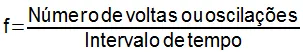!

* Frequência é o número de voltas realizadas por um objeto em mmovimento circular em um intervalo de tempo determinado.

* Na prática:

    * "Uma unidade de medida muito comum para a frequência é a rotação por minuto (r.p.m). Um objeto que executa um movimento circular  a 60 r.p.m, por exemplo, completa 60 rotações por minuto."

 O que é o período? 
 
 * "O período é o tempo necessário para que um objeto em movimento circular conclua uma volta."

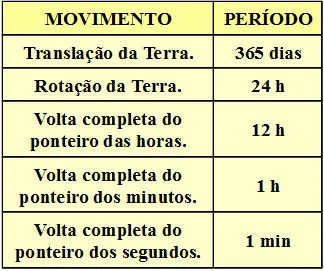!

https://s4.static.brasilescola.uol.com.br/img/2017/04/frequencia.jpg


No caso, ação ou movimento circular é o ato de comprar, o tempo são os dias. Então, a frêquencia que pessoa compra seria quantidade de compras pelo dias. Contuto, não seria mais interressante saber quantos dias a pessoa faz uma compra, no caso um período, já que, se pessoa comprar em 10 dias um total de 10 compras terá a frequência de 10 buy/ 10 day  = 1 buy/day o que significa que ela faz 1 uma compra a cada dia, o que não necessáriamente seja uma verdade,
já que ação dela de comprar, não é algo circular, monótono ela pode ter comprado 8 no dia 1 e dois no dia 10 entre várias opções, **por isso,** não é uma informação útil para construir raciocínio por cima. É mas 
interressante saber quantos itens ou produtos que a pessoa faz em uma compra. Mas neste caso, o que autor deste trabalho talvez buscava a informação em média quantos dias para o meu cliente fazer uma compra, para isso, **é só gerar os dias entre a primeira compra e a última, divídido pelo número de vezes que ele comprou**. O qué de certo modo um período.

intervalo em dias entre a primeira e última compra / número de vezes que comprou

Entretanto, entraria no mesmo problema falado anteriormente. Vamos então imagina a seguinte situação que nos ajudará a construir uma linha de raciocínio.

**Situação de 3 compras em 10 dias**

observações 1: | significa de que foi comprado, - dia que não houve compra!


    *Primeira: compra nos dia 1, 2 e 10 ||-------|
        * Intervalos                  : 1 e 8
        * Média                       : 5
        * Desvio padrão (populacional): 3,53
        * Desvio padrão (Amostragem)  : 5
        
    *Segunta : compra nos dia 1, 5 e 10 |---|----|
        * Intervalos                  : 4 e 5
        * Média                       : 5
        * Desvio padrão (populacional): 0,71
        * Desvio padrão (Amostragem)  : 1
        
    *Terceira: compra nos dia 1, 9 e 10 |-------||
        * Intervalos                  : 8 e 1
        * Média                       : 5
        * Desvio padrão (populacional): 3,53
        * Desvio padrão (Amostragem)  : 5

Conclusão: eles tem o mesmo número de compras e a mesma quantidade de dia, o que gera a mesma média, contudo, com intervalos diferentes, diante disso, vamos criar uma coluna para média e Desvio padrão (amostragem), assim podemos entender intervalos ou periocidade das compras do cliente.


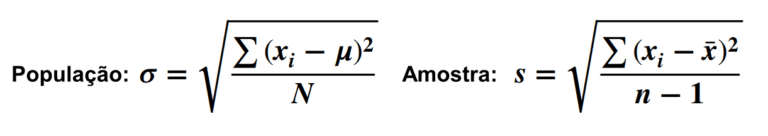

como o que estamos gerando é um tipo de período, e como mostra a imagem o podemos também calcular a frequência através do periodo!

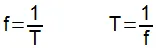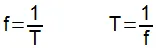

É interressante ressaltar que desvio padrão como mostra a imagem abaixo, é a distância dos valores da média. 

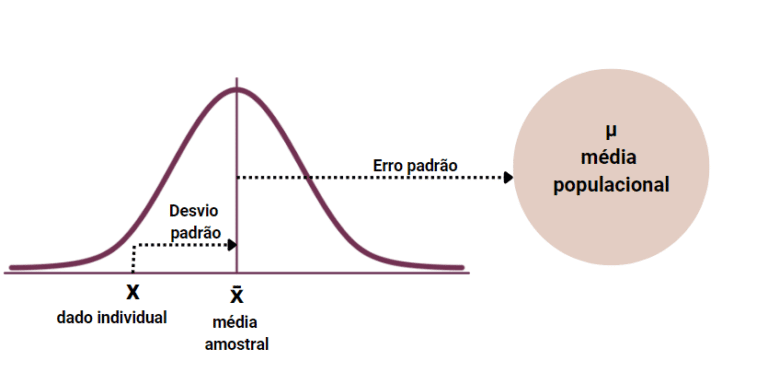!

https://blog.proffernandamaciel.com.br/desvio_erro_padrao/

In [584]:
# colocando em prática
# New features

# Passo 1 (P1) - colocar as datas em ordem cresente

aux  = df3.loc[:,['invoice_no', 'customer_id', 'invoice_date']].groupby(['customer_id','invoice_no'])#.sort_values('invoice_date', ascending = False)
                                    
# calcula o intervalo  

# média 
# desvio padrão
# inverte para encontrar frequência

#aux = ( df3[['invoice_no', 'customer_id', 'invoice_date']]
#                                        .groupby('customer_id')
#                                        .agg(max_ = ('invoice_date', 'max'),
##                                         min_  = ('invoice_date', 'min'),
 #                                        days_ = ('invoice_date', lambda x: ((x.max() - x.min()).days) + 0),
#                                         buys_ = ('invoice_no', 'count')) ).reset_index()#.sort_values('invoice_date', ascending = False)

In [585]:
aux.head()



,invoice_no,customer_id,invoice_date
0,536365,17850.0,2016-11-29
1,536365,17850.0,2016-11-29
2,536365,17850.0,2016-11-29
3,536365,17850.0,2016-11-29
4,536365,17850.0,2016-11-29
...,...,...,...
406814,581587,12680.0,2017-12-07
406815,581587,12680.0,2017-12-07
406816,581587,12680.0,2017-12-07
406817,581587,12680.0,2017-12-07


In [586]:
auxr1 = filtro.sort_values(by=['customer_id', 'invoice_date'], ascending=True)
auxr2 = auxr1[['customer_id','invoice_date']]
auxr3 = auxr2.sort_values(by=['customer_id', 'invoice_date'], ascending=True).reset_index()
auxr3.drop(columns = 'index', axis = 1, inplace = True)



aux1 = df3.sort_values(by=['customer_id', 'invoice_date'], ascending=True)
aux2 = aux1[['customer_id','invoice_date']]
aux3 = aux2.sort_values(by=['customer_id', 'invoice_date'], ascending=True).reset_index()
aux3.drop(columns = 'index', axis = 1, inplace = True)
aux3.head(60)

,customer_id,invoice_date
0,12346.0,2017-01-16
1,12346.0,2017-01-16
2,12347.0,2016-12-05
3,12347.0,2016-12-05
4,12347.0,2016-12-05
5,12347.0,2016-12-05
6,12347.0,2016-12-05
7,12347.0,2016-12-05
8,12347.0,2016-12-05
9,12347.0,2016-12-05


In [587]:
if aux3.loc[0, 'invoice_date'] == aux3.loc[1 , 'invoice_date']:
    print('são iguais')

são iguais


In [588]:
# calcula o intervalo 
#como é um pouco demorodo vou deixar comentado
#contador =  406828
#i = 0 
#while i < 406828:
    # vamos utilizar if para deixar o processo ficando mais leve e direto, n precisando entrar no dataset as vezes!
#    if aux3.loc[i,'customer_id'] == aux3.loc[i+1,'customer_id']: 
        
#        if aux3.loc[i+1, 'invoice_date'] != aux3.loc[i , 'invoice_date']:
            
#            aux3.loc[i,'interval'] = (aux3.loc[i+1,'invoice_date'] - aux3.loc[i,'invoice_date']).days
        
#        else:
#            aux3.loc[i,'interval'] = 0
#    else:
#        aux3.loc[i,'interval'] = 0
#    i = i+1
#for 
#aux2.loc[:'interval'] = aux['invoice_date'].apply(lambda x : ) 


In [589]:
#aux3.head(60)

In [590]:
#aux3.isnull().sum()

In [591]:
#auxr3

In [592]:
# Código otimizado pelo chat-gpt 3.5
aux4 = aux3#.drop(columns = 'interval', axis = 1)
mask = aux3['customer_id'] == aux3['customer_id'].shift(-1)

interval = (aux3['invoice_date'].shift(-1) - aux3['invoice_date']).dt.days
interval[~mask] = 0
interval[~mask | (aux3['invoice_date'] == aux3['invoice_date'].shift(-1))] = 0

aux4['interval'] = interval


# df_ref
# Código otimizado pelo chat-gpt 3.5
auxr4 = auxr3
mask = auxr3['customer_id'] == auxr3['customer_id'].shift(-1)

interval = (auxr3['invoice_date'].shift(-1) - auxr3['invoice_date']).dt.days
interval[~mask] = 0
interval[~mask | (auxr3['invoice_date'] == auxr3['invoice_date'].shift(-1))] = 0

auxr4['interval'] = interval

/tmp/ipykernel_648273/3770000495.py:6: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  interval[~mask] = 0
/tmp/ipykernel_648273/3770000495.py:6: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  interval[~mask] = 0
/tmp/ipykernel_648273/3770000495.py:7: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  interval[~mask | (aux3['invoice_date'] == aux3['invoice_date'].shift(-1))] = 0
/tmp/ipykernel_648273/3770000495.py:7: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  interval[~mask | (aux3['invoice_date'] == aux3['invoice_date'].shift(-1))] = 0
/tmp/ipykernel_648273/3770000495.py:18: SettingWithCopyWar

 Vamos esclarecer cada parte do código otimizado em detalhes:

1. Na linha 2, `shift(-1)`:
   - `shift(-1)` desloca os valores da série para baixo, com `-1` indicando que estamos deslocando as linhas uma posição para cima.
   - Isso compara se o `customer_id` atual é igual ao `customer_id` deslocado por uma posição para baixo na série de dados. Essa abordagem ajuda a identificar correspondências sequenciais de IDs de clientes.

2. Na linha 3, `interval = (aux3['invoice_date'].shift(-1) - aux3['invoice_date']).dt.days`:
   - Aqui, estamos calculando a diferença de dias entre a `invoice_date` atual e a `invoice_date` deslocada uma posição para baixo.
   - O uso de `shift(-1)` ajuda a obter a data subsequente à atual para calcular o intervalo de dias.

3. Na linha 4, `interval[~mask]`:
   - `~mask` é uma negação booleana, que retorna `True` para os valores onde 'mask' é False e vice-versa.
   - Portanto, `interval[~mask]` seleciona apenas as posições onde o `customer_id` não é igual ao `customer_id` da linha subsequente.

4. Na linha 5, `interval[~mask | (aux3['invoice_date'] == aux3['invoice_date'].shift(-1))] = 0`:
   - `|` é o operador OR bitwise, que atua sobre as máscaras booleanas, permitindo que a condição seja atendida se pelo menos uma das subcondições for verdadeira.
   - Aqui, estamos atribuindo 0 aos valores em `interval` que não satisfazem a condição da máscara ou quando as `invoice_date` atuais são iguais às datas deslocadas por uma posição para baixo.

5. Quanto à linha 6, não está realmente transformando tudo em um dataset. Ela simplesmente adiciona os valores calculados de `interval` ao DataFrame `aux3` na coluna 'interval'.

Espero que isso esclareça o funcionamento do código otimizado. Se tiver mais perguntas ou precisar de mais detalhes, fique à vontade para perguntar!   

In [593]:
# Vamos verificar se existe alguma diferença entre os métodos
(aux3['interval'] != aux4['interval']).sum()


np.int64(0)

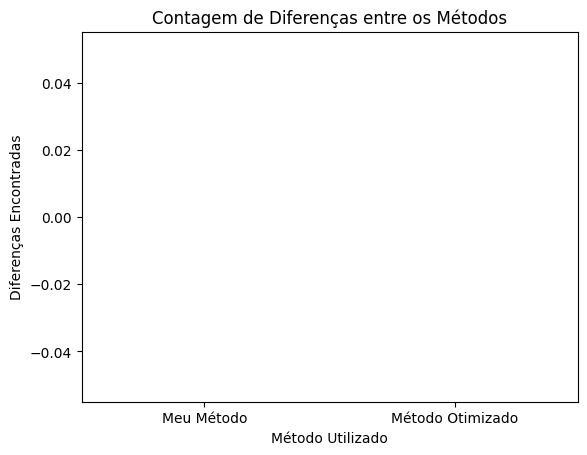

In [594]:
import pandas as pd
import matplotlib.pyplot as plt

# Comparação entre os resultados
comparison = (aux4['interval'] != aux3['interval']).sum()

# Gerando o gráfico
data = {'Método': ['Meu Método', 'Método Otimizado'],
        'Diferenças': [comparison, comparison]}
df = pd.DataFrame(data)

plt.bar(df['Método'], df['Diferenças'], color=['blue', 'green'])
plt.xlabel('Método Utilizado')
plt.ylabel('Diferenças Encontradas')
plt.title('Contagem de Diferenças entre os Métodos')
plt.show()


In [595]:
aux3.isnull().sum()

customer_id     0
invoice_date    0
interval        0
dtype: int64

In [596]:
aux4.isnull().sum()

customer_id     0
invoice_date    0
interval        0
dtype: int64

In [597]:

# média 
# desvio padrão
# inverte para encontrar frequência

aux5 = aux4[[ 'customer_id', 'invoice_date', 'interval']].groupby(['customer_id']).agg(interval_mean = ('interval', 'mean'),
                                                                            interval_std  = ('interval', 'std'),
                                                                            n_buys = ('customer_id', 'count')).reset_index()
# df_ref
auxr5 = auxr4[[ 'customer_id', 'invoice_date', 'interval']].groupby(['customer_id']).agg(interval_mean = ('interval', 'mean'),
                                                                            interval_std  = ('interval', 'std'),
                                                                            n_buys = ('customer_id', 'count')).reset_index()

aux5

,customer_id,interval_mean,interval_std,n_buys
0,12346.0,0.000000,0.000000,2
1,12347.0,2.005495,11.312486,182
2,12348.0,9.129032,33.588432,31
3,12349.0,0.000000,0.000000,73
4,12350.0,0.000000,0.000000,17
...,...,...,...,...
4367,18280.0,0.000000,0.000000,10
4368,18281.0,0.000000,0.000000,7
4369,18282.0,9.153846,31.822021,13
4370,18283.0,0.441799,4.009003,756


In [598]:
aux5.isnull().sum()

customer_id       0
interval_mean     0
interval_std     79
n_buys            0
dtype: int64

In [599]:
# Aproveitando que apredemos a trabalhar um pouco sobre vetores, vamos usar para alterar os Nan's

mask = aux5['interval_std'].isnull()

interval = aux5['interval_std']
interval[mask] = 0
interval[ mask | (aux5['interval_std'] == aux5['interval_std'].isnull)] = 0

aux5['interval_std'] = interval
aux5

#New feactures

mask = auxr5['interval_std'].isnull()

interval = auxr5['interval_std']
interval[mask] = 0
interval[ mask | (auxr5['interval_std'] == aux5['interval_std'].isnull)] = 0

auxr5['interval_std'] = interval

/tmp/ipykernel_648273/4220197948.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval[mask] = 0
/tmp/ipykernel_648273/4220197948.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval[ mask | (aux5['interval_std'] == aux5['interval_std'].isnull)] = 0
/tmp/ipykernel_648273/4220197948.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interval[mask] = 0
/tmp/ipykernel_648273/4220197948.py:18: SettingWithCopyWarning: 
A va

In [600]:
aux5.isnull().sum()

customer_id      0
interval_mean    0
interval_std     0
n_buys           0
dtype: int64

In [601]:
aux5.head()

,customer_id,interval_mean,interval_std,n_buys
0,12346.0,0.000000,0.000000,2
1,12347.0,2.005495,11.312486,182
2,12348.0,9.129032,33.588432,31
3,12349.0,0.000000,0.000000,73
4,12350.0,0.000000,0.000000,17


In [602]:
# Juntando 

#df3.drop(   columns = 'frequency', axis    = 1, inplace = True)
#df_ref.drop(columns = 'frequency', axis    = 1, inplace = True)

#df3 = pd.merge(df3, aux4[['customer_id', 'interval'       ]], on='customer_id', how='left')
df3 = pd.merge(df3, aux5[['customer_id', 'interval_mean'  ]], on='customer_id', how='left')
df3 = pd.merge(df3, aux5[['customer_id', 'interval_std'   ]], on='customer_id', how='left')
df3 = pd.merge(df3, aux5[['customer_id', 'n_buys'          ]], on='customer_id', how='left')

#df_ref = pd.merge(df_ref, auxr4[['customer_id', 'interval'     ]], on='customer_id', how='left')
df_ref = pd.merge(df_ref, auxr5[['customer_id', 'interval_mean']], on='customer_id', how='left')
df_ref = pd.merge(df_ref, auxr5[['customer_id', 'interval_std' ]], on='customer_id', how='left')
df_ref = pd.merge(df_ref, auxr5[['customer_id', 'n_buys'        ]], on='customer_id', how='left')



#df3.head()

In [603]:
df3.isnull().sum()

invoice_no          0
stock_code          0
quantity            0
invoice_date        0
unit_price          0
customer_id         0
country             0
year                0
month               0
month_sin           0
month_cos           0
gross_revenue       0
returned            0
recency_days        0
n_invoice           0
total_items         0
variety_products    0
avg_per_purchase    0
frequency           0
interval_mean       0
interval_std        0
n_buys              0
dtype: int64

### 4.1.10 Number of Returns

In [604]:
df_returns = cancelled[['customer_id', 'quantity']].groupby('customer_id').sum().reset_index().rename(columns={'quantity':'qtde_returns'})
df_returns['qtde_returns'] = df_returns['qtde_returns'] * -1
df_ref = pd.merge(df_ref, df_returns, on='customer_id', how='left')
df_ref.loc[df_ref['qtde_returns'].isna(), 'qtde_returns'] = 0


In [605]:
aux = df3.loc[df3['returned'] == 1, ['customer_id', 'returned']].groupby('customer_id').sum().reset_index().rename( columns = {'returned': 'n_returned'})
aux.head()

,customer_id,n_returned
0,12346.0,1
1,12352.0,10
2,12359.0,6
3,12362.0,8
4,12365.0,1


In [606]:
df3 = pd.merge(df3, aux, on='customer_id', how='left')

In [607]:
df_ref.isnull().sum()

customer_id          0
gross_revenue       33
recency_days        33
qtde_invoices_x     33
qtde_invoices_y     33
qtde_invoices       33
total_items         33
variety_products    33
avg_per_purchase    33
frequency           33
interval_mean       33
interval_std        33
n_buys              33
qtde_returns         0
dtype: int64

In [608]:
df3.isnull().sum()

invoice_no               0
stock_code               0
quantity                 0
invoice_date             0
unit_price               0
customer_id              0
country                  0
year                     0
month                    0
month_sin                0
month_cos                0
gross_revenue            0
returned                 0
recency_days             0
n_invoice                0
total_items              0
variety_products         0
avg_per_purchase         0
frequency                0
interval_mean            0
interval_std             0
n_buys                   0
n_returned          153037
dtype: int64

In [609]:
df3['n_returned'] = df3['n_returned'].apply(lambda x: 0 if x == 'nan' or 'Nan' or 'NAN' or 'NaN' else x)

In [610]:
df3.isnull().sum()

invoice_no          0
stock_code          0
quantity            0
invoice_date        0
unit_price          0
customer_id         0
country             0
year                0
month               0
month_sin           0
month_cos           0
gross_revenue       0
returned            0
recency_days        0
n_invoice           0
total_items         0
variety_products    0
avg_per_purchase    0
frequency           0
interval_mean       0
interval_std        0
n_buys              0
n_returned          0
dtype: int64

### 4.1.11 Basket Size - Quantidade de itens por cesta (Quantity) 

In [611]:
ux = ( filtro.loc[:, ['customer_id', 'invoice_no', 'quantity']].groupby('customer_id')
                                                                          .agg(n_purchase = ('invoice_no', 'nunique'),
                                                                               n_products = ('quantity', 'sum')).reset_index() )
ux.head()

,customer_id,n_purchase,n_products
0,12346.0,1,74215
1,12347.0,7,2458
2,12348.0,4,2341
3,12349.0,1,631
4,12350.0,1,197


In [612]:
df3[df3['customer_id'] == 12346 ].head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id,country,year,month,month_sin,...,recency_days,n_invoice,total_items,variety_products,avg_per_purchase,frequency,interval_mean,interval_std,n_buys,n_returned
38120,541431,23166,74215,2017-01-16,1.04,12346.0,United Kingdom,2017,1,0.5,...,325,2,0,2,38591.8,0.0,0.0,0.0,2,0
38125,C541433,23166,-74215,2017-01-16,1.04,12346.0,United Kingdom,2017,1,0.5,...,325,2,0,2,38591.8,0.0,0.0,0.0,2,0


Embora seja estranho esse cliente 12346 comprou em um única compra 74215 de único produto, provalvemente ele revende.

In [613]:
df_aux = ( filtro.loc[:, ['customer_id', 'invoice_no', 'quantity']].groupby('customer_id')
                                                                          .agg(n_purchase = ('invoice_no', 'nunique'),
                                                                               n_products = ('quantity', 'sum')).reset_index() )

df_aux['avg_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']
df_ref = pd.merge(df_ref, df_aux[['customer_id', 'avg_basket_size']], on='customer_id', how='left')



In [614]:
aux = ( df3.loc[:, ['customer_id', 'invoice_no', 'quantity']].groupby('customer_id')
                                                                          .agg(n_purchase = ('invoice_no', 'nunique'),
                                                                               n_products = ('quantity', 'sum')).reset_index() )
aux
aux['avg_basket_size'] = aux['n_products'] /  aux['n_purchase']
df3 = pd.merge(df3, aux[['customer_id', 'avg_basket_size']], on='customer_id', how='left')

In [615]:
df3.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id,country,year,month,month_sin,...,n_invoice,total_items,variety_products,avg_per_purchase,frequency,interval_mean,interval_std,n_buys,n_returned,avg_basket_size
0,536365,85123A,6,2016-11-29,2.55,17850.0,United Kingdom,2016,11,-0.5,...,312,1693,312,17.279519,0.492958,0.227564,3.963192,312,0,48.371429
1,536365,71053,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,-0.5,...,312,1693,312,17.279519,0.492958,0.227564,3.963192,312,0,48.371429
2,536365,84406B,8,2016-11-29,2.75,17850.0,United Kingdom,2016,11,-0.5,...,312,1693,312,17.279519,0.492958,0.227564,3.963192,312,0,48.371429
3,536365,84029G,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,-0.5,...,312,1693,312,17.279519,0.492958,0.227564,3.963192,312,0,48.371429
4,536365,84029E,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,-0.5,...,312,1693,312,17.279519,0.492958,0.227564,3.963192,312,0,48.371429


### 4.1.12 Unique Basket Size - Quantidade de Itens por Cesta (Stock_code)

Não quantidade de itens por cesta, mas quantidade de tipos de produto por cesta!

In [616]:
df_aux = ( filtro.loc[:, ['customer_id', 'invoice_no', 'stock_code']].groupby('customer_id')
                                                                          .agg(n_purchase = ('invoice_no', 'nunique'),
                                                                               n_products = ('stock_code', 'nunique')).reset_index() )

df_aux['avg_product_per_basket'] = df_aux['n_products'] / df_aux['n_purchase']
df_ref = pd.merge(df_ref, df_aux[['customer_id', 'avg_product_per_basket']], on='customer_id', how='left')
df_ref.isna().sum()

customer_id                0
gross_revenue             33
recency_days              33
qtde_invoices_x           33
qtde_invoices_y           33
qtde_invoices             33
total_items               33
variety_products          33
avg_per_purchase          33
frequency                 33
interval_mean             33
interval_std              33
n_buys                    33
qtde_returns               0
avg_basket_size           33
avg_product_per_basket    33
dtype: int64

In [617]:
aux = ( filtro.loc[:, ['customer_id', 'invoice_no', 'stock_code']].groupby('customer_id')
                                                                          .agg(n_purchase = ('invoice_no', 'nunique'),
                                                                               n_products = ('stock_code', 'nunique')).reset_index() )

aux['avg_product_per_basket'] = aux['n_products'] / aux['n_purchase']
df3 = pd.merge(df3, aux[['customer_id', 'avg_product_per_basket']], on='customer_id', how='left')
df3.isna().sum()

invoice_no                 0
stock_code                 0
quantity                   0
invoice_date               0
unit_price                 0
customer_id                0
country                    0
year                       0
month                      0
month_sin                  0
month_cos                  0
gross_revenue              0
returned                   0
recency_days               0
n_invoice                  0
total_items                0
variety_products           0
avg_per_purchase           0
frequency                  0
interval_mean              0
interval_std               0
n_buys                     0
n_returned                 0
avg_basket_size            0
avg_product_per_basket    88
dtype: int64

In [618]:
df_ref['avg_product_per_basket'] = df_ref['avg_product_per_basket'].apply(lambda x: 0 if x == 'nan' or 'Nan' or 'NAN' or 'NaN' else x)

In [619]:
df3['avg_product_per_basket'] = df3['avg_product_per_basket'].apply(lambda x: 0 if x == 'nan' or 'Nan' or 'NAN' or 'NaN' else x)

In [620]:
df_ref.isna().sum()

customer_id                0
gross_revenue             33
recency_days              33
qtde_invoices_x           33
qtde_invoices_y           33
qtde_invoices             33
total_items               33
variety_products          33
avg_per_purchase          33
frequency                 33
interval_mean             33
interval_std              33
n_buys                    33
qtde_returns               0
avg_basket_size           33
avg_product_per_basket     0
dtype: int64

In [621]:
df3.isna().sum()

invoice_no                0
stock_code                0
quantity                  0
invoice_date              0
unit_price                0
customer_id               0
country                   0
year                      0
month                     0
month_sin                 0
month_cos                 0
gross_revenue             0
returned                  0
recency_days              0
n_invoice                 0
total_items               0
variety_products          0
avg_per_purchase          0
frequency                 0
interval_mean             0
interval_std              0
n_buys                    0
n_returned                0
avg_basket_size           0
avg_product_per_basket    0
dtype: int64

# 5.0 Exploratory Data Analysis

In [507]:
df4 = df_ref.dropna()
df4.isna().sum()

customer_id               0
gross_revenue             0
recency_days              0
qtde_invoices_x           0
qtde_invoices_y           0
qtde_invoices             0
total_items               0
variety_products          0
avg_per_purchase          0
frequency                 0
interval_mean             0
interval_std              0
n_buys                    0
qtde_returns              0
avg_basket_size           0
avg_product_per_basket    0
dtype: int64

In [ ]:
df4.drop(columns = 'qtde_invoices_x', axis = 1, inplace = True)
df4.rename(columns = {'qtde_invoices_y': 'qtde_invoices'}, inplace = True)
df4.head()

## 5.1 Analise Univariada

In [ ]:
#central tendency - mean, median
ct1 = pd.DataFrame(round(df4.apply(np.mean),2)).T
ct2 = pd.DataFrame(round(df4.apply(np.median),2)).T

#dispersion 
d1 = pd.DataFrame(round(df4.apply(np.std),2)).T
d2 = pd.DataFrame(round(df4.apply(np.min),2)).T
d3 = pd.DataFrame(round(df4.apply(np.max),2)).T
d4 = pd.DataFrame(round(df4.apply(lambda x: x.max() - x.min()),2)).T
d5 = pd.DataFrame(round(df4.apply(lambda x: x.std()/x.mean()),2)).T


#concatenate
m = pd.concat([d2 ,d3, d4, ct1, ct2, d1, d5]).T.reset_index()
m = m.drop([0])
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'CV'  ]
m

### 5.1.1 Gross Revenue

In [ ]:
plt.figure( figsize = (14, 4))
plt.subplot( 1, 2, 1 )
sns.boxplot(data = df4[df4['gross_revenue'] < 3000], x = 'gross_revenue' )

plt.subplot(1,2, 2)
sns.histplot (data = df4[df4['gross_revenue']< 3000], x = 'gross_revenue')
plt.show()

In [ ]:
df4.sort_values('gross_revenue', ascending=False).head()

### 5.1.2 Recency days 

In [ ]:
* Maior partes do clientes do banco de dados compraram até 75 dias
* 50 dia é a média segundo o gráfico do boxplot

In [ ]:
plt.figure(figsize = (14,4))
plt.subplot(1, 2, 1)
sns.boxplot( data = df4,   x = 'recency_days')

plt.subplot(1 , 2, 2 )
sns.histplot( data = df4, x = 'recency_days')
plt.axvline(x=75, color='r', linestyle='--')
plt.show()

### 5.1.3 Quantidade de Invoices 

* 

In [ ]:
plt.figure(figsize = (14,4))
plt.subplot(1, 2, 1)
sns.boxplot( data = df4,   x = 'qtde_items')

plt.subplot(1 , 2, 2 )
sns.histplot( data = df4, x = 'qtde_items')
#plt.axvline(x=75, color='r', linestyle='--')
plt.show()

In [ ]:
plt.figure(figsize = (14,4))
plt.subplot(1, 2, 1)
sns.boxplot( data = df4,   x = 'qtde_items')

plt.subplot(1 , 2, 2 )
sns.histplot( data = df4[df4['qtde_items'] < 3000], x = 'qtde_items')
plt.axvline(x=100, color='r', linestyle='--')
plt.show()

Boa partes das pessoas que compra no nosso site, já obtiveram por volta de 400 items

### 4.1.4 Avg. Ticket

In [ ]:
plt.figure(figsize = (14,4))
plt.subplot(1, 2, 1)
sns.boxplot( data = df4,   x = 'avg_ticket')

plt.subplot(1 , 2, 2 )
sns.histplot( data = df4[df4['avg_ticket'] < 500], x = 'avg_ticket')
plt.axvline(x=20, color='r', linestyle='--')
plt.show()

### 5.2.1 Bivariate Analysis

### 5.3 Estudo do Espaço

In [ ]:
#selected dataset
cols_selected = ['customer_id', 'gross_revenue', 'recency_days', 'qtde_products', 'frequency', 'qtde_returns']
df43 = df4[cols_selected].drop(columns='customer_id', axis=1)


In [ ]:
mm = pp.MinMaxScaler()

df43['gross_revenue']          = mm.fit_transform(df43[['gross_revenue']])
df43['recency_days']            = mm.fit_transform(df43[['recency_days']])
df43['qtde_products']          = mm.fit_transform(df43[['qtde_products']])
df43['frequency']              = mm.fit_transform(df43[['frequency']])
df43['qtde_returns']           = mm.fit_transform(df43[['qtde_returns']])

X = df43.copy()
X.head()

In [ ]:
pca = dd.PCA(n_components = X.shape[1])

principal_components = pca.fit_transform(X)

#plot explained variables
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_, color='black')

#pca component
df_pca = pd.DataFrame(principal_components)


In [ ]:
sns.scatterplot(x=0, y=1, data=df_pca);

### 5.3.2 UMAP 

In [ ]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X)

#embedding
df_umap = pd.DataFrame()
df_umap['embedding_x'] = embedding[:, 0]
df_umap['embedding_y'] = embedding[:, 1]

#plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y', data=df_umap)


### 5.3.3 UMAP

In [ ]:
reducer = mn.TSNE(n_components=2, n_jobs=-1, random_state=42) 
embedding = reducer.fit_transform(X)

#embedding
df_tsne = pd.DataFrame()
df_tsne['embedding_x'] = embedding[:, 0]
df_tsne['embedding_y'] = embedding[:, 1]

#plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y', data=df_tsne)


### 4.3.3 T-SNE

In [ ]:
reducer = mn.TSNE(n_components=2, n_jobs=-1, random_state=42) 
embedding = reducer.fit_transform(X)

#embedding
df_tsne = pd.DataFrame()
df_tsne['embedding_x'] = embedding[:, 0]
df_tsne['embedding_y'] = embedding[:, 1]

#plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y', data=df_tsne)

### 4.3.4 Tree-Based Embedding

In [ ]:
X = df43.drop(columns=['gross_revenue'], axis=1)
y = df43['gross_revenue']

rf_model = en.RandomForestRegressor(n_estimators=100, random_state=42) #sao criadas 100 arvores 

rf_model.fit(X,y)

df_leaf = pd.DataFrame(rf_model.apply(X))

In [ ]:
df_leaf.head() 

In [ ]:
#reducer dimensionality
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_leaf)

#embedding
df_tree = pd.DataFrame()
df_tree['embedding_x'] = embedding[:, 0]
df_tree['embedding_y'] = embedding[:, 1]

#plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y', data=df_tree)

## 5.2 Creating of hypotheses

Embora a validação de hipóteses seja feito em Analise exploratória de dados, realizada aqui para aumentar familiariadade com dados 

### H1 - O país sede de origem do site é o que mais vende!

**TRUE**

In [ ]:
aux = df4.loc[:,['country', 'quantity']].groupby('country').sum().sort_values('quantity', ascending = False)


In [ ]:
aux = df4.loc[:,['country', 'quantity']].groupby('country').sum().sort_values('quantity', ascending = False)
sns.barplot(x = 'country', y = 'quantity', data = aux)

plt.xticks( rotation = 90)

plt.show()

In [ ]:
df4[['customer_id', 'country']].drop_duplicates().groupby('country').count().sort_values('customer_id',ascending = False )

In [ ]:
# Em porcentagem
df4['country'].value_counts(normalize = True).head()

### H2 - Qual produto que mais vende

In [ ]:
aux = df4.loc[df4['quantity']>= 0]
aux = aux.loc[:, ['stock_code', 'quantity']].groupby('stock_code').sum().sort_values('quantity', ascending = False)
aux

| Produto     | Description|    
|--------------|-----------|
|23843	|PAPER CRAFT , LITTLE BIRDIE|
|23166	|MEDIUM CERAMIC TOP STORAGE JAR|
|84077	|WORLD WAR 2 GLIDERS ASSTD DESIGNS|
|22197	|SMALL POPCORN HOLDER|	
|85099B	|JUMBO BAG RED RETROSPOT|


### H3 - De qual país é o cliente que mais compra

**o Cliente que mais compra é da United Kingdom**

In [ ]:
df4.head()

In [ ]:
aux = df4.loc[:,['country', 'customer_id', 'quantity']].groupby(['country', 'customer_id']).count().sort_values('quantity', ascending = False)
aux

### H4 - Qual o periodo do ano que mais vende ?

Do mễs de outubro ao dezembro

In [ ]:
df4.head()

In [ ]:


# Converta a coluna 'Timestamp' para o formato datetime
df4['invoice_date'] = pd.to_datetime(df4['invoice_date'])

# Crie um filtro para selecionar os valores antes de 2017
filtro = df4[df4['invoice_date'].dt.year < 2017]
filtro

In [ ]:
# 2016
aux =  filtro.loc[:,['invoice_date', 'quantity']].groupby('invoice_date').sum().sort_values('quantity', ascending = False)
aux.head()

In [ ]:
# 2017


# Converta a coluna 'Timestamp' para o formato datetime
df4['invoice_date'] = pd.to_datetime(df4['invoice_date'])

# Crie um filtro para selecionar os valores antes de 2017
filtro = df4[df4['invoice_date'].dt.year > 2016]
filtro
aux =  filtro.loc[:,['invoice_date', 'quantity']].groupby('invoice_date').sum().sort_values('quantity', ascending = False)
aux.head()

### H5 - Qual o periodo do ano que menos vende?
Fevereiro e Março

In [ ]:
# 2016


# Converta a coluna 'Timestamp' para o formato datetime
df4['invoice_date'] = pd.to_datetime(df4['invoice_date'])

# Crie um filtro para selecionar os valores antes de 2017
filtro = df4[df4['invoice_date'].dt.year > 2016]
filtro
aux =  filtro.loc[:,['invoice_date', 'quantity']].groupby('invoice_date').sum().sort_values('quantity', ascending = True)
aux.head()

In [ ]:
# 2017


# Converta a coluna 'Timestamp' para o formato datetime
df4['invoice_date'] = pd.to_datetime(df4['invoice_date'])

# Crie um filtro para selecionar os valores antes de 2017
filtro = df4[df4['invoice_date'].dt.year > 2016]
filtro
aux =  filtro.loc[:,['invoice_date', 'quantity']].groupby('invoice_date').sum().sort_values('quantity', ascending = True)
aux.head()

# 6.0 Data Preparation

# 7.0 Hypermarameter Fine-Tunning

In [ ]:
X = df_tree.copy()


X.head()

clusters = np.arange(2,25,1)

## 7.1 K-Means

In [ ]:
kmeans_list = []

for k in clusters:
    #model definition
    kmeans_model = c.KMeans(n_clusters=k, n_init = 100, random_state=42)

    #model training
    kmeans_model.fit(X)

    #model predict
    labels = kmeans_model.predict(X)

    #model performance 
    sil = m.silhouette_score(X, labels, metric='euclidean')
    kmeans_list.append(sil)



In [ ]:
plt.plot(clusters, kmeans_list, linestyle='--', marker='o', color='b')
plt.xlabel('Values of K')
plt.ylabel('Silhouete Score')
plt.title('Silhouete Score vs K')

## 7.2 GMM

In [ ]:
gmm_list = []

for k in clusters:
    #model definition
    gmm_model = mx.GaussianMixture(n_components=k, random_state=42)  #define quantas guassianas eu quero


    #model training
    gmm_model.fit(X)

    #model predict
    labels = gmm_model.predict(X)

    #model performance 
    sil = m.silhouette_score(X, labels, metric='euclidean')
    gmm_list.append(sil)

In [ ]:
plt.plot(clusters, gmm_list, linestyle='--', marker='o', color='b')
plt.xlabel('Values of K')
plt.ylabel('Silhouete Score')
plt.title('Silhouete Score vs K')

## 7.3 Hierarchical Clustering

In [ ]:
#model deinition and training
hc_model = hc.linkage(X,'ward')

In [ ]:
#hc.dendrogram( hc_model, leaf_rotation=90, leaf_font_size=8)
#plt.plot()

In [ ]:
hc_list = []
for k in clusters:
    #model definition and training
    hc_model = hc.linkage(X,'ward')
    
    #model predict
    labels = hc.fcluster(hc_model, k, criterion='maxclust')
    
    #metrics
    sil = m.silhouette_score(X, labels, metric='euclidean')
    hc_list.append(sil)

In [ ]:
plt.plot(clusters, hc_list, linestyle='--', marker='o', color='b')

## 7.5 Results

In [ ]:
df_results = pd.DataFrame({'KMeans': kmeans_list, 'GMM': gmm_list, 'HC': hc_list}).T
df_results.columns = clusters
df_results.style.highlight_max(color='lightgreen', axis=1)


In [ ]:
8.0 Model Training

In [ ]:
8.1 k-Means

In [ ]:
#model definition
k = 7
kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

#model trainning
kmeans.fit(X)

#clustering
labels = kmeans.labels_
#labels = kmeans.fit_predict(X) #tirar o fit de cima


In [ ]:
8.2 Cluster Validation

In [ ]:
#SS
print('SS value: {}'.format(m.silhouette_score(X, labels, metric='euclidean')))

In [ ]:
9.0 Cluster Analysis

In [ ]:
df9 = X.copy()
df9['cluster'] = labels
df9.head()

In [ ]:
9.1 Visualization Inspection

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='embedding_x', y='embedding_y', hue='cluster', data=df9, palette='deep');


In [ ]:
9.2 Cluster Profile

In [ ]:
df4.head()

In [ ]:
df92 = df4[cols_selected].copy()
df92['cluster'] = labels
df92.head()

In [ ]:
#Number customer
df_cluster = df92.groupby('cluster').customer_id.count().reset_index()
df_cluster['perc_customer'] = 100*(df_cluster['customer_id'] / df_cluster['customer_id'].sum())

#Avg Gross Revenue
df_avg_gross_revenue = df92.groupby('cluster').gross_revenue.mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gross_revenue, how='inner', on='cluster')

#Avg Recency Days
df_avg_recency_days = df92.groupby('cluster').recency_days.mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency_days, how='inner', on='cluster')

#Avg invoice_no
df_qtde_products = df92.groupby('cluster').qtde_products.mean().reset_index()
df_cluster = pd.merge(df_cluster, df_qtde_products, how='inner', on='cluster')

#Frequency
df_frequency = df92.groupby('cluster').frequency.mean().reset_index()
df_cluster = pd.merge(df_cluster, df_frequency, how='inner', on='cluster')

#Returns
df_qtde_returns = df92.groupby('cluster').qtde_returns.mean().reset_index()
df_cluster = pd.merge(df_cluster, df_qtde_returns, how='inner', on='cluster')


df_cluster.sort_values('gross_revenue', ascending=False)

In [ ]:
10.0 EDA

In [ ]:
df10 = df92

In [ ]:
H1. Os clientes do cluster insiders possuem um volume de compra de produtos acima de 10% do totatl de compras

verdadeiro: O cluster insider possui um volume de compra de 54%

In [ ]:
#df10[df10['cluster'] ==1].groupby('cluster').qtde_products.sum().reset_index()

#sum the quantity of products of insiders
df_sales_insiders = df10[df10['cluster'] == 6].qtde_products.sum() #substituir depois o cluster correspondente ao insiders
df_sales_total = df10.qtde_products.sum()

#percentage of sales of insiders by the total product sales
print('% Sales Insiders: {:.2f}'.format(100*df_sales_insiders/df_sales_total))

In [ ]:

H2. Os clientes do cluster insiders possuem um volume de faturamento de compras acima de 10% do total de compras

verdadeiro: O cluster insider possui um volume de gmv de 52%


In [ ]:
#sum the gmv of insiders
df_gmv_insiders = df10[df10['cluster'] == 6].gross_revenue.sum() #substituir depois o cluster correspondente ao insiders
df_gmv_total = df10.gross_revenue.sum()

#percentage of sales of insiders by the tot/al product sales
print('% Sales Insiders: {:.2f}'.format(100*df_gmv_insiders/df_gmv_total))

In [ ]:

H3. Os clientes do cluster insiders tem numero de devolução médio abaixo do media da base total de clientes

Falso: O cluster insiders tem a média de devolução acima da média geral


In [ ]:
df_avg_return_insiders = df10[df10['cluster'] == 6].qtde_returns.mean()
df_avg_return_total = df10.qtde_returns.mean()

print('Avg Return insiders: {} vs Avg Returns total: {}'.format(np.round(df_avg_return_insiders, 0),
                                                               np.round(df_avg_return_total, 0)))



In [ ]:

H4. A mediana do faturamento pelos clientes do cluster insider é 10% do que a mediana do faturamento geral

verdadeiro: A mediana do faturamento é 279% acima da mediana


In [ ]:
#mediana de gmv do insiders
df_median_gmv_insiders = df10[df10['cluster'] == 6].gross_revenue.median()

#mediana de gmv do total
df_median_gmv_total = df10.gross_revenue.median()

gmv_diff = (df_median_gmv_insiders - df_median_gmv_total) / df_median_gmv_total
print('Median Diff: {:.2f}%'.format(100*gmv_diff))


In [ ]:

H5. O GMV dos clientes insiders está concentradas no 3 quartil

Falso: O faturamento do cluster insiders esta concentrada no quartil 1


In [ ]:
np.percentile(df10[df10['cluster'] == 3].gross_revenue, q=0.1)

In [ ]:
np.percentile(df10[df10['cluster'] == 3].gross_revenue, q=0.9)

In [ ]:
df_aux = (df10[(df10['cluster'] == 3) & 
               (df10['gross_revenue'] < 10000)]
               .gross_revenue)
sns.boxplot(x=df_aux)

In [ ]:
df_aux = (df10[(df10['cluster'] == 3) &
               (df10['gross_revenue'] < 10000)]
               .gross_revenue)
sns.violinplot(x=df_aux)